### Torch - CUDA

In [ ]:
!conda install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia

In [4]:
print(torch.version.cuda)

None


In [3]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 970'

In [2]:
torch.cuda.is_available()

True

In [1]:
import torch
torch.cuda.current_device()

0

In [4]:
print("Pytorch CUDA Version is ", torch.version.cuda)

Pytorch CUDA Version is  11.6


## Downloading datset

In [10]:
! wget -c https://www.dropbox.com/s/bc5e9ew17ldlfhx/part_label_test_128p_v2.tar &>/dev/null

The syntax of the command is incorrect.


## Downloading the model

In [2]:
! wget -c https://www.dropbox.com/s/38q1cgxt1qu407h/ptlabel_best_model.pth &>/dev/null

The syntax of the command is incorrect.


## Extracting

In [2]:
%%bash
if [ -z ${TMPDIR} ]; then TMPDIR='/tmp'; else echo "TMPDIR is set to $TMPDIR"; fi
echo $TMPDIR
PT_LABEL=part_label_test_128p_v2.tar
mkdir -p $TMPDIR/eval
tar -C $TMPDIR/eval -xf $PT_LABEL 

Couldn't find program: 'bash'


In [ ]:
#! git clone https://github.com/isi-vista/structure_via_consensus.git

In [ ]:
%%bash  
wget -c https://www.dropbox.com/s/x055zrg47kmz3x1/structure_via_consensus-master.zip &>/dev/null
unzip structure_via_consensus-master.zip
cp -r structure_via_consensus-master/src_release/ .

Archive:  structure_via_consensus-master.zip
396b3d4513205c2245610c1e30b45bb2bba861bc
   creating: structure_via_consensus-master/
  inflating: structure_via_consensus-master/.gitignore  
  inflating: structure_via_consensus-master/LICENSE  
  inflating: structure_via_consensus-master/README.md  
   creating: structure_via_consensus-master/imgs/
  inflating: structure_via_consensus-master/imgs/teaser.png  
   creating: structure_via_consensus-master/src_release/
  inflating: structure_via_consensus-master/src_release/aug2D.py  
  inflating: structure_via_consensus-master/src_release/conf_matrix.py  
  inflating: structure_via_consensus-master/src_release/data_loader.py  
  inflating: structure_via_consensus-master/src_release/data_tools.py  
   creating: structure_via_consensus-master/src_release/models/
  inflating: structure_via_consensus-master/src_release/models/encoder_decoder_faceoccnet.py  
  inflating: structure_via_consensus-master/src_release/part_label_dataset.py  
  inflati

In [ ]:
%%bash
rm -rf structure_via_consensus-master
rm structure_via_consensus-master.zip

# Define and Load Model

In [4]:
pip install torch

SyntaxError: invalid syntax (3280090445.py, line 1)

In [5]:
pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.1/1.1 MB 23.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
!conda install pandas

^C


# START OF CODE FOR REAL
---

In [7]:
import sys
import os
import torch
import torchvision
import numpy as np
import pandas as pd
sys.path.append('src_release')

In [12]:
from data_loader import get_dataloader
from models.encoder_decoder_faceoccnet import FaceOccNet 
from torch_utils import torch_load_weights,evaluation,viz_notebook,plot_confusion_matrix

In [46]:
load_model_path = ("./ptlabel_best_model.pth")
eval_path = os.path.join('tmp','eval\girl_torch')
model = FaceOccNet(input_channels=3, n_classes=3,is_regularized=True)

In [47]:
print(eval_path)

tmp\eval\girl_torch


In [48]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

FaceOccNet(
  (model_enc): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (2): ELU(alpha=1.0, inplace=True)
    (3): ReflectionPad2d((1, 1, 1, 1))
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (5): ELU(alpha=1.0, inplace=True)
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReflectionPad2d((1, 1, 1, 1))
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (9): ELU(alpha=1.0, inplace=True)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReflectionPad2d((1, 1, 1, 1))
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (13): ELU(alpha=1.0, inplace=True)
    (14): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReflectionPad2d((1, 1, 1, 1))
    (16): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
    (17): ELU(alpha=1.0, inplace=Tru

In [49]:
from torchsummary import summary
print('[Start] Model')
print(model)
print('[End] Model')    
print('[Start] Keras viz')
summary(model,(3,128,128))
print('[End] Keras viz')

[Start] Model
FaceOccNet(
  (model_enc): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (2): ELU(alpha=1.0, inplace=True)
    (3): ReflectionPad2d((1, 1, 1, 1))
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (5): ELU(alpha=1.0, inplace=True)
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReflectionPad2d((1, 1, 1, 1))
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (9): ELU(alpha=1.0, inplace=True)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReflectionPad2d((1, 1, 1, 1))
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (13): ELU(alpha=1.0, inplace=True)
    (14): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReflectionPad2d((1, 1, 1, 1))
    (16): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
    (17): ELU(alpha=1.

In [18]:
# You have to set def load in serialization.py to have its map_location parameter = 'cpu'
if os.path.exists(load_model_path) and os.path.isfile(load_model_path):
    _, _ = torch_load_weights(model, None, load_model_path, model_only=True)
    print(f'Loaded model from {load_model_path}')
else:
    print(f'The model does not exist in {load_model_path} or is not a file')

Loaded model from ./ptlabel_best_model.pth


## Data Loader

In [171]:
name2class = {'bg':0,'face':1,'hair':2}
eval_dataloader = get_dataloader( (eval_path,),
                                  batch_size=2,
                                  mode='eval', num_workers = 4
                                  n_classes=3,
                                  dataset_name='PartLabel')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (35168659.py, line 4)

In [163]:
for x, y in enumerate(eval_dataloader):
    print("x is: ", x)
    print("y is: ", y)

2023-02-13 08:56:12,134 - part_label_dataset - ERROR - Error(The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0) in dataloader. Continuing to the next index..


x is:  0
y is:  [tensor([[[[-0.9059, -0.9059, -0.8980,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9059, -0.9059, -0.9059,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9059, -0.8980, -0.8980,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [ 0.2078,  0.2000,  0.2000,  ..., -0.5686, -0.7725, -0.9765],
          [ 0.2000,  0.1922,  0.1843,  ..., -0.5294, -0.7804, -0.9922],
          [ 0.2000,  0.1765,  0.1765,  ..., -0.5216, -0.7882, -0.9922]],

         [[-0.9216, -0.9216, -0.9137,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9216, -0.9216, -0.9216,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9137, -0.9137, -0.9137,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [ 0.1451,  0.1529,  0.1686,  ...,  0.0588, -0.4431, -0.9608],
          [ 0.1451,  0.1529,  0.1608,  ...,  0.0667, -0.4745, -0.9608],
          [ 0.1686,  0.1529,  0.1608,  ...,  0.0745, -0.5294, -0.9686]],

         [[-0.9137, -0.9137, -0.9059,  ..., -1.0000, -1.0000, -1.0000],
          [-0

# 128 pixel rez

## Evaluation

In [164]:
conf_matrix_px_128, conf_matrix_super_px_128, result_128 = evaluation(model,eval_dataloader,name2class,is250=False,string_label='eval',n_classes=3,super_px=True)
assert conf_matrix_px_128.conf_mat.sum()==128*128*927
pd.DataFrame({ k : [v] for k,v in result_128.items()})

2023-02-13 08:56:20,785 - torch_utils - INFO - -------------------eval------------------
eval: 100%|██████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.09it/s]
2023-02-13 08:56:21,116 - torch_utils - INFO - eval global_pix_acc_sp:0.103586
2023-02-13 08:56:21,117 - torch_utils - INFO - eval global_pix_acc:0.291443
2023-02-13 08:56:21,118 - torch_utils - INFO - eval avg_recall:0.284310
2023-02-13 08:56:21,119 - torch_utils - INFO - eval----
2023-02-13 08:56:21,119 - torch_utils - INFO - eval bg_recall:0.280883
2023-02-13 08:56:21,120 - torch_utils - INFO - eval bg_precision:0.618817
2023-02-13 08:56:21,121 - torch_utils - INFO - eval bg_iou:0.239453
2023-02-13 08:56:21,122 - torch_utils - INFO - eval----
2023-02-13 08:56:21,123 - torch_utils - INFO - eval bg_f_measure:0.386385
2023-02-13 08:56:21,124 - torch_utils - INFO - eval----
2023-02-13 08:56:21,125 - torch_utils - INFO - eval face_recall:0.360475
2023-02-13 08:56:21,126 - torch_util

AssertionError: 

In [165]:
result_128.items()

dict_items([('pix_acc', 0.29144287109375), ('spix_acc', 0.10358565737051793), ('bg_recall', 0.280883431085044), ('bg_precision', 0.6188168786593984), ('bg_IoU', 0.239453125), ('bg_f_measure', 0.3863851244878664), ('face_recall', 0.3604745214343489), ('face_precision', 0.1606971153846154), ('face_IoU', 0.12504676393565284), ('face_f_measure', 0.22229611771552085), ('hair_recall', 0.21157118547929665), ('hair_precision', 0.11989713918354226), ('hair_IoU', 0.08287047322817152), ('hair_f_measure', 0.15305703734099302), ('mean_iou', 0.1491234540546081), ('err_l1_cc', 1176.0)])

## Plot Confusion Matrix

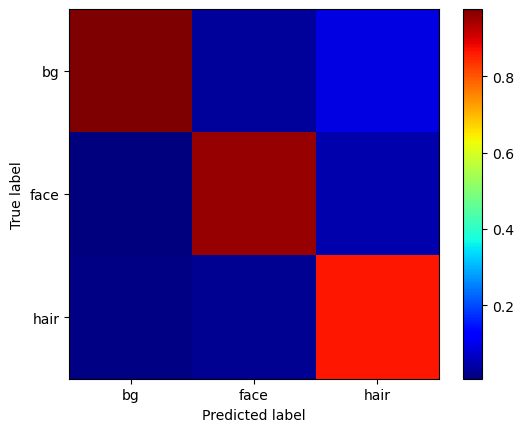

In [21]:
plot_confusion_matrix(conf_matrix_px_128,name2class)

## Visualization of 1st batch

In [30]:
viz_notebook

<function torch_utils.viz_notebook(model, eval_dataloader, device, ibv_stop=-1)>

viz: 0it [00:00, ?it/s]2023-02-13 08:56:39,327 - part_label_dataset - ERROR - Error(The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0) in dataloader. Continuing to the next index..


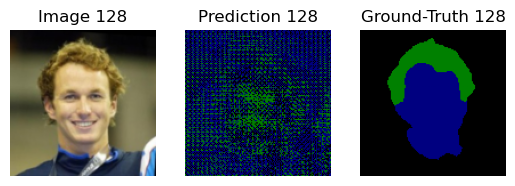

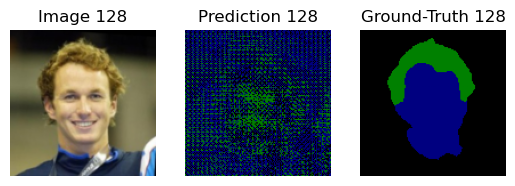

viz: 0it [00:00, ?it/s]


In [22]:
viz_notebook(model,eval_dataloader,device,ibv_stop=0)

# 250 pixel rez

In [ ]:
%%bash
wget -c https://www.dropbox.com/s/ylfyupbxg642tnb/part_label_test_250p_v2.tar &>/dev/null

In [ ]:
%%bash
if [ -z ${TMPDIR} ]; then TMPDIR='/tmp'; else echo "TMPDIR is set to $TMPDIR"; fi
echo $TMPDIR
PT_LABEL=part_label_test_250p_v2.tar
mkdir -p $TMPDIR/eval-250
tar -C $TMPDIR/eval-250 -xf $PT_LABEL 

/tmp


In [ ]:
eval_250_path = os.path.join('/tmp','eval-250/part_label_test_250p')

In [ ]:
name2class = {'bg':0,'face':1,'hair':2}
eval_dataloader_250 = get_dataloader( (eval_250_path,),
                                  batch_size=64,
                                  mode='eval', num_workers=0,
                                  n_classes=3,
                                  dataset_name='PartLabel')

2020-03-18 01:10:06,278 - part_label_dataset - WARNING - We are processing part labels for 250p case!
2020-03-18 01:10:06,280 - part_label_dataset - INFO - reading the image files...
2020-03-18 01:10:06,297 - part_label_dataset - INFO - finished initializing the dataloader 927 files.


In [ ]:
conf_matrix_px_250, conf_matrix_super_px_250, result_250 = evaluation(model,eval_dataloader_250,name2class,is250=True,string_label='eval',n_classes=3,super_px=True)

2020-03-18 01:10:17,586 - torch_utils - INFO - -------------------eval------------------
eval:   0%|          | 0/15 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
eval: 100%|██████████| 15/15 [05:40<00:00, 19.82s/it]
2020-03-18 01:15:57,715 - torch_utils - INFO - eval global_pix_acc_sp:0.967832
2020-03-18 01:15:57,716 - torch_utils - INFO - eval global_pix_acc:0.958594
2020-03-18 01:15:57,717 - torch_utils - INFO - eval avg_recall:0.929323
2020-03-18 01:15:57,718 - torch_utils - INFO - eval----
2020-03-18 01:15:57,720 - torch_utils - INFO - eval bg_recall:0.975761
2020-03-18 01:15:57,721 - torch_utils - INFO - eval bg_precision:0.978775
2020-03-18 01:15:57,722 - torch_utils - INFO - eval bg_iou:0.955542
2020-03-18 01:15:57,723 - torch_utils - INFO - eval----
2020-03

## Final Result

In [ ]:
result = {}
for k,v in result_128.items():
    if k != 'err_l1_cc':
        result[k] = [v*100,result_250[k]*100]
    else:
        result[k] = [v,result_250[k]]
import pandas as pd
pd.DataFrame(result,index=['128p','250p'])

,pix_acc,spix_acc,bg_recall,bg_precision,bg_IoU,bg_f_measure,face_recall,face_precision,face_IoU,face_f_measure,hair_recall,hair_precision,hair_IoU,hair_f_measure,mean_iou,err_l1_cc
128p,96.056839,96.802146,97.643728,98.010945,95.746415,97.826992,95.525846,94.646360,90.628819,95.084069,86.495882,86.029339,75.842694,86.261979,87.405976,3.513484
250p,95.859371,96.783240,97.576120,97.877508,95.554237,97.726582,94.918409,94.572512,90.014987,94.745145,86.302288,85.198947,75.050212,85.747068,86.873145,3.641855


In [ ]:
assert conf_matrix_px_250.conf_mat.sum()==250*250*927

## Plot Confusion Matrix

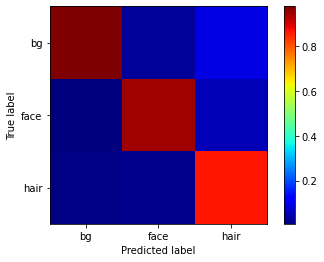

In [ ]:
plot_confusion_matrix(conf_matrix_px_250,name2class)